In [ ]:
#Based on the work of https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [11]:
# LSTM for international airline passengers problem with window regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
numpy.random.seed(2018)
# load the dataset
dataframe = read_csv('../data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')





In [12]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [13]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [14]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [16]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [17]:
trainX

array([[[0.01544401, 0.02702703, 0.05405405]],

       [[0.02702703, 0.05405405, 0.04826255]],

       [[0.05405405, 0.04826255, 0.03281853]],

       [[0.04826255, 0.03281853, 0.05984557]],

       [[0.03281853, 0.05984557, 0.08494207]],

       [[0.05984557, 0.08494207, 0.08494207]],

       [[0.08494207, 0.08494207, 0.06177607]],

       [[0.08494207, 0.06177607, 0.02895753]],

       [[0.06177607, 0.02895753, 0.        ]],

       [[0.02895753, 0.        , 0.02702703]],

       [[0.        , 0.02702703, 0.02123553]],

       [[0.02702703, 0.02123553, 0.04247104]],

       [[0.02123553, 0.04247104, 0.07142857]],

       [[0.04247104, 0.07142857, 0.05984557]],

       [[0.07142857, 0.05984557, 0.04054055]],

       [[0.05984557, 0.04054055, 0.08687258]],

       [[0.04054055, 0.08687258, 0.12741312]],

       [[0.08687258, 0.12741312, 0.12741312]],

       [[0.12741312, 0.12741312, 0.10424709]],

       [[0.12741312, 0.10424709, 0.05598456]],

       [[0.10424709, 0.05598456, 0.01930

In [18]:
testX

array([[[0.4073359 , 0.3803089 , 0.48648646]],

       [[0.3803089 , 0.48648646, 0.47104248]],

       [[0.48648646, 0.47104248, 0.484556  ]],

       [[0.47104248, 0.484556  , 0.6138996 ]],

       [[0.484556  , 0.6138996 , 0.6969112 ]],

       [[0.6138996 , 0.6969112 , 0.70077217]],

       [[0.6969112 , 0.70077217, 0.57915056]],

       [[0.70077217, 0.57915056, 0.46911195]],

       [[0.57915056, 0.46911195, 0.38803086]],

       [[0.46911195, 0.38803086, 0.44787642]],

       [[0.38803086, 0.44787642, 0.45559844]],

       [[0.44787642, 0.45559844, 0.4131274 ]],

       [[0.45559844, 0.4131274 , 0.4980695 ]],

       [[0.4131274 , 0.4980695 , 0.47104248]],

       [[0.4980695 , 0.47104248, 0.49999997]],

       [[0.47104248, 0.49999997, 0.6389961 ]],

       [[0.49999997, 0.6389961 , 0.7471043 ]],

       [[0.6389961 , 0.7471043 , 0.7741313 ]],

       [[0.7471043 , 0.7741313 , 0.57915056]],

       [[0.7741313 , 0.57915056, 0.492278  ]],

       [[0.57915056, 0.492278  , 0.39768

In [19]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
92/92 [==============================] - 1s 15ms/step - loss: 0.0456
Epoch 2/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0169
Epoch 3/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0112
Epoch 4/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0096
Epoch 5/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0083
Epoch 6/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0071
Epoch 7/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0061
Epoch 8/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 9/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0049
Epoch 10/100
92/92 [==============================] - 1s 6ms/step - loss: 0.0044
Epoch 11/100
92/92 [==============================] - 1s 8ms/step - loss: 0.0041
Epoch 12/100
92/92 [==============================] - 1s 7ms/step - loss: 0.0039
Epoch 13/100
92/92 [================

Train Score: 24.19 RMSE
Test Score: 58.04 RMSE


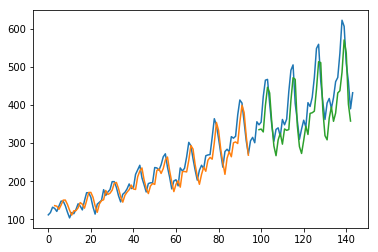

In [10]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#LSTM with Memory Between Batches



Epoch 1/1
 - 2s - loss: 0.0048
Epoch 1/1
 - 1s - loss: 0.0082
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0048
Epoch 1/1
 - 1s - loss: 0.0047
Epoch 1/1
 - 1s - loss: 0.0047
Epoch 1/1
 - 1s - loss: 0.0047
Epoch 1/1
 - 1s - loss: 0.0046
Epoch 1/1
 - 1s - loss: 0.0045
Epoch 1/1
 - 1s - loss: 0.0045
Epoch 1/1
 - 1s - loss: 0.0044
Epoch 1/1
 - 1s - loss: 0.0043
Epoch 1/1
 - 1s - loss: 0.0043
Epoch 1/1
 - 1s - loss: 0.0042
Epoch 1/1
 - 1s - loss: 0.0042
Epoch 1/1
 - 1s - loss: 0.0041
Epoch 1/1
 - 1s - loss: 0.0041
Epoch 1/1
 - 1s - loss: 0.0040
Epoch 1/1
 - 1s - loss: 0.0040
Epoch 1/1
 - 1s - loss: 0.0039
Epoch 1/1
 - 1s - loss: 0.0038
Epoch 1/1
 - 1s - loss: 0.0037
Epoch 1/1
 - 1s - loss: 0.0037
Epoch 1/1
 - 1s - loss: 0.0036
Epoch 1/1
 - 1s - loss: 0.0035
Epoch 1/1
 - 1s - loss: 0.0034
Epoch 1/1
 - 1s - loss: 0.0033
Epoch 1/1
 - 1s - loss: 0.0032
Epoch 1/1
 - 1s - loss: 0.0032
Epoch 1/1
 - 1s - loss: 0.0031
Epoch 1/1
 - 1s - loss: 0.0030
Epoch 1/1
 - 1s - loss: 0.0029
Epoch 1/

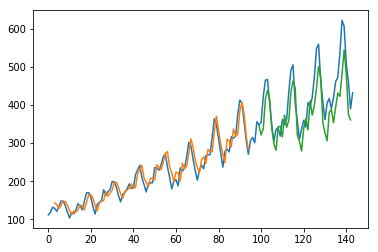

In [20]:
# LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('../data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#Stacked LSTMs with Memory Between Batches



Epoch 1/1
 - 3s - loss: 0.0057
Epoch 1/1
 - 1s - loss: 0.0141
Epoch 1/1
 - 1s - loss: 0.0099
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0060
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0056
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/1
 - 1s - loss: 0.0055
Epoch 1/

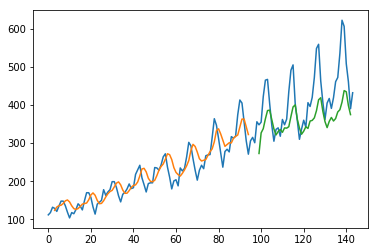

In [22]:
# Stacked LSTM for international airline passengers problem with memory
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('../data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
	model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()